# Relations

Using 'John Snow data' to explore:

1. accessing <a href="#access">shapely geometries</a> from geopandas
2. calculating <a href="#distances">distances</a> (between points)
3. <a href="#buff">creating buffers</a> (around points, creating polygons)
4. exploring <a href="#wc">within and contains</a> (points and polygons) 

In [3]:
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt

<a name ="access"></a> 

## Accessing shapely geometries from geopandas <a id='access'></a>

In [4]:
# Load point data
pumps = gpd.read_file('../../data/csds/snow7/pumps.shp')
# Load building blocks
blocks = gpd.read_file('../../data/dani/polys.shp')

In [5]:
pumps.dtypes

ID             int64
x            float64
y            float64
name          object
geometry    geometry
dtype: object

In [6]:
pumps

,ID,x,y,name,geometry
0,1,529396.539395,181025.063047,Broad St Pump,POINT (529396.539 181025.063)
1,2,529192.537868,181079.391380,Great Malborough Pump,POINT (529192.538 181079.391)
2,3,529183.739766,181193.735013,Ramilies Place Pump,POINT (529183.740 181193.735)
3,5,529613.205238,180896.804121,Rupert St Pump,POINT (529613.205 180896.804)
4,6,529453.585995,180826.353152,Brewer St Pump,POINT (529453.586 180826.353)
5,8,529296.104419,180794.849037,Warwick St Pump,POINT (529296.104 180794.849)


In [7]:
#returns #DataFrame
print(pumps.iloc[[0],])
print(pumps[pumps['name']=='Broad St Pump'])

   ID              x              y           name  \
0   1  529396.539395  181025.063047  Broad St Pump   

                        geometry  
0  POINT (529396.539 181025.063)  
   ID              x              y           name  \
0   1  529396.539395  181025.063047  Broad St Pump   

                        geometry  
0  POINT (529396.539 181025.063)  


In [8]:
#returns Series
print(pumps.iloc[0])
print(pumps[pumps['name']=='Broad St Pump'].squeeze())

ID                                                    1
x                                                529397
y                                                181025
name                                      Broad St Pump
geometry    POINT (529396.5393954368 181025.0630474603)
Name: 0, dtype: object
ID                                                    1
x                                                529397
y                                                181025
name                                      Broad St Pump
geometry    POINT (529396.5393954368 181025.0630474603)
Name: 0, dtype: object


In [9]:
#returns geometry object
print(pumps.loc[0,'geometry'])
print(pumps[pumps['name']=='Broad St Pump']['geometry'].squeeze())

POINT (529396.5393954368 181025.0630474603)
POINT (529396.5393954368 181025.0630474603)


In [10]:
#check the crs
pumps.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: UK - Britain and UKCS 49°45'N to 61°N, 9°W to 2°E
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

<AxesSubplot:>

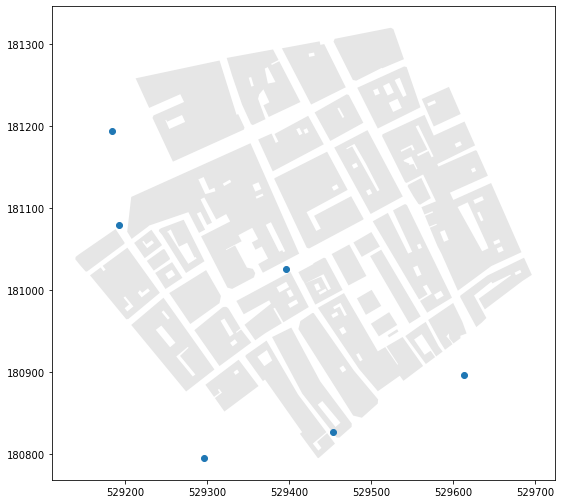

In [11]:
#quick plot
f, ax = plt.subplots(1, figsize=(9, 9))
blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
pumps.plot(ax=ax)

## Calculating Distances <a name ="distances"></a> 

between points

<AxesSubplot:>

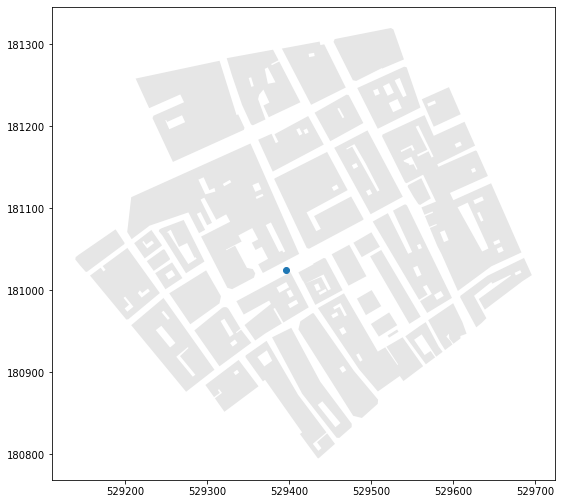

In [12]:
#locate the Broad Street Pump
f, ax = plt.subplots(1, figsize=(9, 9))
blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
pumps[pumps['name']=='Broad St Pump'].plot(ax=ax)   

use `.distance` to calculate between Broad St Pump and Rupert St Pump

In [13]:
#single line using loc (but need to know which line pumps are on)
pumps.loc[0,'geometry'].distance(pumps.loc[3,'geometry'])

251.78252434361087

In [14]:
#or using pump names
A='Broad St Pump'
B='Rupert St Pump'

pumps[pumps['name']==A]['geometry'].squeeze().distance(pumps[pumps['name']==B]['geometry'].squeeze())

251.78252434361087

In [15]:
#same as last but splits code a little more nicely I think
pointA=pumps[pumps['name']=='Broad St Pump']['geometry'].squeeze()
pointB=pumps[pumps['name']=='Rupert St Pump']['geometry'].squeeze()
pointA.distance(pointB)

251.78252434361087

In [16]:
#loop to calculate distances between Broad St Pump and multiple other pumps
bsPump = pumps.loc[0,'geometry']

for i in pumps['geometry']:
    print(bsPump.distance(i))

0.0
211.11179754252572
271.53989398983026
251.78252434361087
206.73639507983233
251.16861852726475


In [23]:
#loop with nicer format

focalName='Broad St Pump'
focalPump = pumps[pumps['name']==focalName]['geometry'].squeeze()

print('Distance between...')
for index, row in pumps.iterrows():
    
    print('{0} and {1} is {2} m'.format(
        row['name'],
        focalName,
        round(focalPump.distance(row['geometry']),1)        
    ))

Distance between...
Broad St Pump and Broad St Pump is 0.0 m
Great Malborough Pump and Broad St Pump is 211.1 m
Ramilies Place Pump and Broad St Pump is 271.5 m
Rupert St Pump and Broad St Pump is 251.8 m
Brewer St Pump and Broad St Pump is 206.7 m
Warwick St Pump and Broad St Pump is 251.2 m


## Creating Buffers <a name ="buff"></a> 

around points, creating polygons

In [24]:
#add the buffers as a new Series in the geoDataFrame
pumps['buffer']=pumps.buffer(200)

In [25]:
#buffer creates polygons
pumps

,ID,x,y,name,geometry,buffer
0,1,529396.539395,181025.063047,Broad St Pump,POINT (529396.539 181025.063),"POLYGON ((529596.539 181025.063, 529595.576 18..."
1,2,529192.537868,181079.391380,Great Malborough Pump,POINT (529192.538 181079.391),"POLYGON ((529392.538 181079.391, 529391.575 18..."
2,3,529183.739766,181193.735013,Ramilies Place Pump,POINT (529183.740 181193.735),"POLYGON ((529383.740 181193.735, 529382.777 18..."
3,5,529613.205238,180896.804121,Rupert St Pump,POINT (529613.205 180896.804),"POLYGON ((529813.205 180896.804, 529812.242 18..."
4,6,529453.585995,180826.353152,Brewer St Pump,POINT (529453.586 180826.353),"POLYGON ((529653.586 180826.353, 529652.623 18..."
5,8,529296.104419,180794.849037,Warwick St Pump,POINT (529296.104 180794.849),"POLYGON ((529496.104 180794.849, 529495.141 18..."


In [26]:
#calculate polygon area with `area` method
pumps['buffer'].iloc[0].area

125461.93962183727

In [27]:
#check area makes sense... yes but with error due to precision above
3.14 * 200**2

125600.0

<AxesSubplot:>

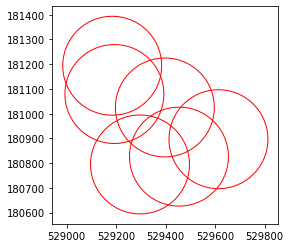

In [28]:
#quickly visualise buffers
pumps['buffer'].plot(facecolor='none',edgecolor='red')

<AxesSubplot:>

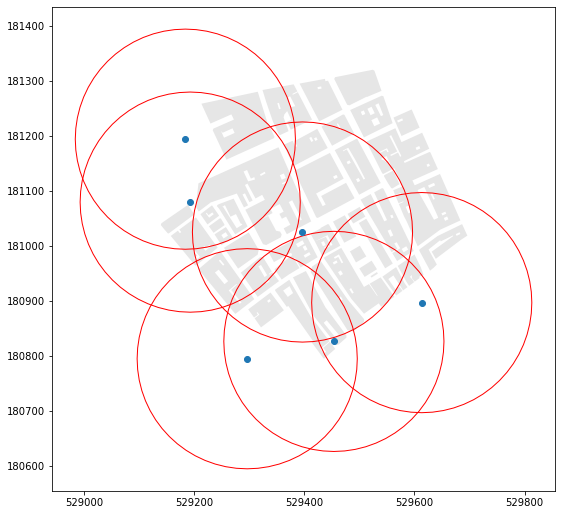

In [29]:
#nicer visualisation with blocks and pumps
f, ax = plt.subplots(1, figsize=(9, 9))
blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
pumps['buffer'].plot(ax=ax, facecolor='none', edgecolor='red')
pumps['geometry'].plot(ax=ax)

<AxesSubplot:>

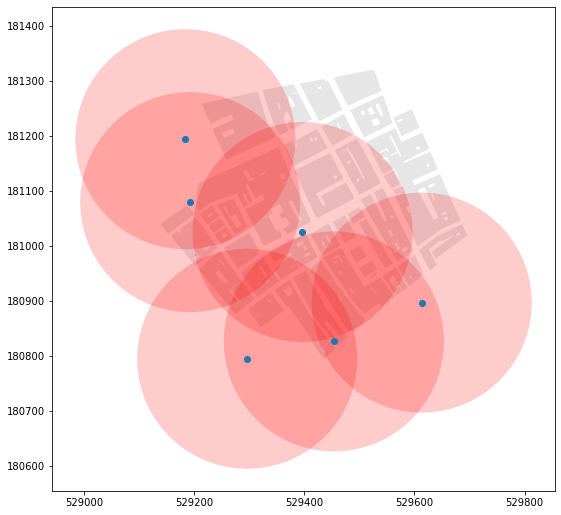

In [30]:
#plotting with translucent colour allows better visualisation of overlaps

f, ax = plt.subplots(1, figsize=(9, 9))
blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
pumps['buffer'].plot(ax=ax, linewidth=0, facecolor='red', alpha=0.2)
pumps['geometry'].plot(ax=ax)

## Within and Contains <a name ="wc"></a> 

In [31]:
#check which buffers Broad St Pump is within

focalName='Broad St Pump'
focalPump = pumps[pumps['name']==focalName]['geometry'].squeeze()

for i in pumps['buffer']:
    
    print(focalPump.within(i))

True
False
False
False
False
False


In [32]:
#nicer format

focalName='Broad St Pump'
focalPump = pumps[pumps['name']==focalName]['geometry'].squeeze()

for index, row in pumps.iterrows():
    
    if focalPump.within(row['buffer']):
        print('{0} is within the buffer of {1}'.format(
            row['name'],
            focalName)
        )

Broad St Pump is within the buffer of Broad St Pump


In [33]:
#check which buffers Ruper St Pump is within

focalName='Rupert St Pump'
focalPump = pumps[pumps['name']==focalName]['geometry'].squeeze()

for index, row in pumps.iterrows():
    
    if focalPump.within(row['buffer']):
        print('{0} is within the buffer of {1}'.format(
            focalName,
            row['name'])
        )

Rupert St Pump is within the buffer of Rupert St Pump
Rupert St Pump is within the buffer of Brewer St Pump


In [34]:
#check which pumps Broad St Pump BUFFER contains

focalName='Rupert St Pump'
focalBuffer = pumps[pumps['name']==focalName]['buffer'].squeeze()

for index, row in pumps.iterrows():
    
    if focalBuffer.contains(row['geometry']):
        print('{0} buffer contains {1} pump'.format(
            focalName,
            row['name'])
        )

Rupert St Pump buffer contains Rupert St Pump pump
Rupert St Pump buffer contains Brewer St Pump pump


In our case the results of `contains` and `within` will always be reciprocal (i.e. the same) because the buffers are all the same size. But if if we had variable size buffers then we might start getting different results for `contains` and `within` for combinations of buffers and pumps... 